<a href="https://colab.research.google.com/github/victorsenoguchi/MAC0460_-_Introduction_to_Machine_Learning/blob/main/EP5%20-%20Deep%20Learning%20(CNN)/ep5_Deep_Learning_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from time import time

In [12]:
seed= 2021

np.random.seed(seed); tf.random.set_seed(seed)

# 2. MNIST Dataset

In [13]:
 from tensorflow.keras.datasets import mnist

## 2.1. Data Preparation

In [14]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = mnist.load_data()

In [15]:
num_classes = max(len(np.unique(y_train_ori)),
                  len(np.unique(y_test_ori)))

In [16]:
X_train_ori = (X_train_ori/255.0).astype("float32")
y = y_train_ori
X_test_ori = (X_test_ori/255.0).astype("float32")
y_test = y_test_ori

## 2.2. MultiLayer Neural Network

In [17]:
X = X_train_ori.reshape((60000,28*28))
X_test = X_test_ori.reshape((10000,28*28))

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y,
                                                  stratify = y,
                                                  train_size = 0.9,
                                                  random_state = seed)

### 2.2.1. Defining and Training Model

In [19]:
mnn = models.Sequential()
 
mnn.add(layers.Dense(256, 
                     activation = "relu", 
                     input_shape = (28*28,)))
 
mnn.add(layers.Dropout(0.5))
 
mnn.add(layers.Dense(256,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.5))
 
mnn.add(layers.Dense(num_classes, 
                     activation = "softmax"))
                    
mnn.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",   
            metrics = ['accuracy'])
 
ti = time()
mnn_mnist = mnn.fit(X_train,
                    y_train, 
                    validation_data = (X_val, y_val),
                    epochs = 16,
                    batch_size = 64,
                    verbose = 1)
tf = time()
mnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 4s 4ms/step - loss: 0.4266 - accuracy: 0.8691 - val_loss: 0.1526 - val_accuracy: 0.9533
Epoch 2/16
844/844 [==============================] - 3s 4ms/step - loss: 0.2134 - accuracy: 0.9378 - val_loss: 0.1156 - val_accuracy: 0.9667
Epoch 3/16
844/844 [==============================] - 3s 4ms/step - loss: 0.1709 - accuracy: 0.9495 - val_loss: 0.1020 - val_accuracy: 0.9697
Epoch 4/16
844/844 [==============================] - 3s 4ms/step - loss: 0.1506 - accuracy: 0.9547 - val_loss: 0.0956 - val_accuracy: 0.9730
Epoch 5/16
844/844 [==============================] - 3s 4ms/step - loss: 0.1306 - accuracy: 0.9607 - val_loss: 0.0859 - val_accuracy: 0.9753
Epoch 6/16
844/844 [==============================] - 3s 4ms/step - loss: 0.1204 - accuracy: 0.9643 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 7/16
844/844 [==============================] - 3s 4ms/step - loss: 0.1146 - accuracy: 0.9656 - val_loss: 0.0765 - val_accuracy: 0.9773
Epoch 

### 2.2.2. Evaluation

##### Loss Curves

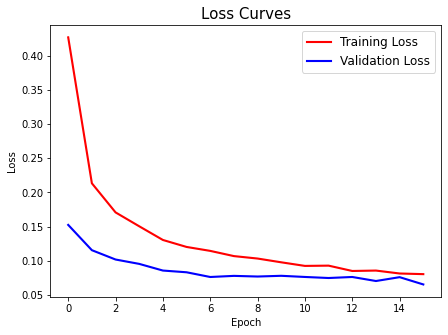

In [20]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

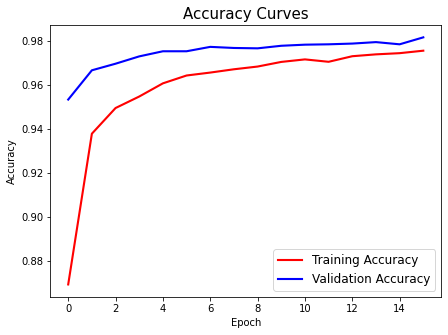

In [21]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [22]:
[mnn_loss, mnn_acc] = mnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(mnn_loss, mnn_acc))
 
print(" Training Time: {0:.3f}s".format(mnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9803

Evaluation result on Test Set :

 Loss = 0.069
 Accuracy = 0.980
 Training Time: 54.330s


## 2.3. Convolutional Neural Network

In [23]:
X = X_train_ori.reshape((60000, 28, 28, 1))
X_test = X_test_ori.reshape((10000, 28, 28, 1))

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y, 
                                                  stratify = y,
                                                  train_size = 0.9,
                                                  random_state = seed)

### 2.3.1. Defining and Training Model

In [25]:
cnn = models.Sequential()
 
cnn.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
 
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
 
cnn.add(layers.Dense(64, activation = "relu"))
 
cnn.add(layers.Dense(10, activation = "softmax"))
 
cnn.compile(optimizer = 'adam',
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
 
ti = time()
cnn_mnist = cnn.fit(X_train,  
                    y_train, 
                    validation_data = (X_val, y_val),
                    batch_size = 64,
                    epochs = 16)
tf = time()
cnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 6s 6ms/step - loss: 0.2721 - accuracy: 0.9201 - val_loss: 0.1115 - val_accuracy: 0.9668
Epoch 2/16
844/844 [==============================] - 5s 6ms/step - loss: 0.1077 - accuracy: 0.9677 - val_loss: 0.0623 - val_accuracy: 0.9800
Epoch 3/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0790 - accuracy: 0.9758 - val_loss: 0.0569 - val_accuracy: 0.9823
Epoch 4/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.0481 - val_accuracy: 0.9863
Epoch 5/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0528 - accuracy: 0.9829 - val_loss: 0.0450 - val_accuracy: 0.9862
Epoch 6/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 7/16
844/844 [==============================] - 5s 6ms/step - loss: 0.0409 - accuracy: 0.9869 - val_loss: 0.0425 - val_accuracy: 0.9873
Epoch 

### 2.3.2. Evaluation

##### Loss Curves

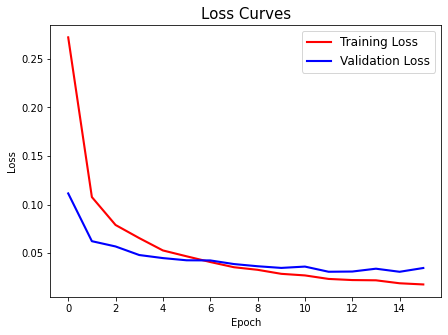

In [26]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

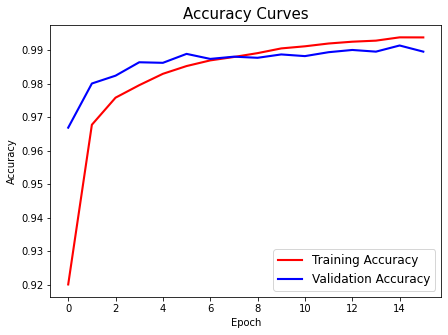

In [27]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [28]:
[cnn_loss, cnn_acc] = cnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set:\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(cnn_loss, cnn_acc))

print(" Training Time: {0:.3f}s".format(cnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.0328 - accuracy: 0.9899

Evaluation result on Test Set:

 Loss = 0.033
 Accuracy = 0.990
 Training Time: 79.113s


## 2.4. Model Comparison

In [29]:
if cnn_acc > mnn_acc:
  print("The convolutial neural network has the best test accuracy")
  print("Test accuracy = {0:.3f}".format(cnn_acc))
  print("The convolutial neural network test accuracy is {0:.3f}% better than the multilayer neural network".format(100*(cnn_acc-mnn_acc)/mnn_acc))
else:
  print("The multilayer neural network has the best test accuracy")
  print("Test Accuracy = {0:.3f}".format(mnn_acc))
  print("The multilayer neural network test accuracy is {0:.3f}% better than the convolutial neural network".format(100*(mnn_acc-cnn_acc)/cnn_acc))
 
print()
 
if cnn_tt < mnn_tt:
  print("The convolutial neural network has the best training time")
  print("Training time = {0:.3f}s".format(cnn_tt))
  print("The convolutial neural network training time is {0:.3f}% faster than the multilayer neural network".format(100*(mnn_tt-cnn_tt)/cnn_tt))
else:
  print("The multilayer neural network has the best training time")
  print("Training time = {0:.3f}s".format(mnn_tt))
  print("The multilayer neural network training time is {0:.3f}% faster than the convolutial neural network".format(100*(cnn_tt-mnn_tt)/mnn_tt))

The convolutial neural network has the best test accuracy
Test accuracy = 0.990
The convolutial neural network test accuracy is 0.979% better than the multilayer neural network

The multilayer neural network has the best training time
Training time = 54.330s
The multilayer neural network training time is 45.614% faster than the convolutial neural network


# 3. Fashion MNIST Dataset

In [30]:
from tensorflow.keras.datasets import fashion_mnist

## 3.1. Data Preparation

In [31]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori) = fashion_mnist.load_data()

In [32]:
num_classes = max(len(np.unique(y_train_ori)),
                  len(np.unique(y_test_ori)))

In [33]:
X_train_ori = (X_train_ori/255.0).astype("float32")
y = y_train_ori
X_test_ori = (X_test_ori/255.0).astype("float32")
y_test = y_test_ori

## 3.2. MultiLayer Neural Network

In [34]:
X = X_train_ori.reshape((60000,28*28))
X_test = X_test_ori.reshape((10000,28*28))

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y,
                                                  stratify = y,
                                                  train_size = 0.9,
                                                  random_state = seed)

### 3.2.1. Defining and Training Model

In [36]:
mnn = models.Sequential()
 
mnn.add(layers.Dense(256, 
                     activation = "relu", 
                     input_shape = (28*28,)))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(512,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(512,
                     activation = "relu"))
 
mnn.add(layers.Dropout(0.25))
 
mnn.add(layers.Dense(num_classes, 
                     activation = "softmax"))
                    
mnn.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",   
            metrics = ['accuracy'])
 
ti = time()
mnn_mnist = mnn.fit(X_train,
                    y_train, 
                    validation_data = (X_val, y_val),
                    epochs = 16,
                    batch_size = 64,
                    verbose = 1)
tf = time()
mnn_tt = tf - ti

Epoch 1/16
844/844 [==============================] - 5s 5ms/step - loss: 0.5608 - accuracy: 0.7977 - val_loss: 0.4150 - val_accuracy: 0.8468
Epoch 2/16
844/844 [==============================] - 4s 5ms/step - loss: 0.4233 - accuracy: 0.8477 - val_loss: 0.3906 - val_accuracy: 0.8505
Epoch 3/16
844/844 [==============================] - 4s 5ms/step - loss: 0.3913 - accuracy: 0.8574 - val_loss: 0.3556 - val_accuracy: 0.8698
Epoch 4/16
844/844 [==============================] - 4s 5ms/step - loss: 0.3703 - accuracy: 0.8662 - val_loss: 0.3324 - val_accuracy: 0.8792
Epoch 5/16
844/844 [==============================] - 4s 5ms/step - loss: 0.3535 - accuracy: 0.8711 - val_loss: 0.3488 - val_accuracy: 0.8750
Epoch 6/16
844/844 [==============================] - 4s 5ms/step - loss: 0.3403 - accuracy: 0.8762 - val_loss: 0.3244 - val_accuracy: 0.8755
Epoch 7/16
844/844 [==============================] - 4s 5ms/step - loss: 0.3312 - accuracy: 0.8796 - val_loss: 0.3225 - val_accuracy: 0.8807
Epoch 

### 3.2.2. Evaluation

##### Loss Curves

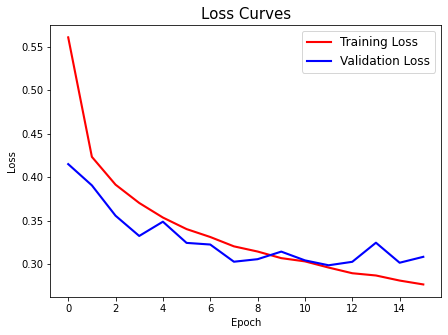

In [37]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

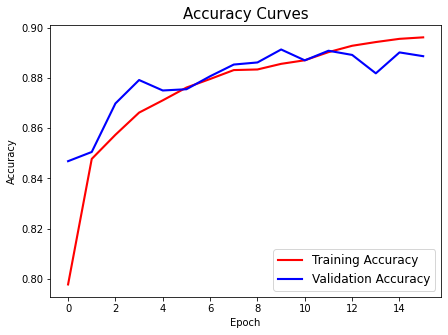

In [38]:
plt.figure(figsize = [7, 5]) 
plt.plot(mnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(mnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [39]:
[mnn_loss, mnn_acc] = mnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(mnn_loss, mnn_acc))

print(" Training Time: {0:.3f}s".format(mnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8825

Evaluation result on Test Set :

 Loss = 0.342
 Accuracy = 0.882
 Training Time: 63.052s


## 3.3. Convolutional Neural Network

In [40]:
X = X_train_ori.reshape((60000, 28, 28, 1))
X_test = X_test_ori.reshape((10000, 28, 28, 1))

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X,  
                                                  y, 
                                                  stratify = y,
                                                  train_size = 0.7, 
                                                  random_state = seed)

### 3.2.1. Defining and Training Model

In [42]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D((2, 2)))
 
 
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
 
cnn.add(layers.Dense(64, activation = "relu"))

cnn.add(layers.Dense(10, activation = "softmax"))
 
cnn.compile(optimizer = 'adam',
            loss = "sparse_categorical_crossentropy",
            metrics = ['accuracy'])
 
ti = time()
cnn_mnist = cnn.fit(X_train,  
                    y_train, 
                    validation_data = (X_val, y_val),
                    batch_size = 64,
                    epochs = 16)
tf = time()
cnn_tt = tf - ti

Epoch 1/16
657/657 [==============================] - 5s 8ms/step - loss: 0.5055 - accuracy: 0.8201 - val_loss: 0.3688 - val_accuracy: 0.8687
Epoch 2/16
657/657 [==============================] - 4s 7ms/step - loss: 0.3502 - accuracy: 0.8762 - val_loss: 0.3157 - val_accuracy: 0.8888
Epoch 3/16
657/657 [==============================] - 5s 7ms/step - loss: 0.3111 - accuracy: 0.8884 - val_loss: 0.2909 - val_accuracy: 0.8987
Epoch 4/16
657/657 [==============================] - 5s 7ms/step - loss: 0.2916 - accuracy: 0.8936 - val_loss: 0.3058 - val_accuracy: 0.8909
Epoch 5/16
657/657 [==============================] - 4s 6ms/step - loss: 0.2734 - accuracy: 0.9002 - val_loss: 0.2837 - val_accuracy: 0.9004
Epoch 6/16
657/657 [==============================] - 5s 7ms/step - loss: 0.2586 - accuracy: 0.9043 - val_loss: 0.2684 - val_accuracy: 0.9053
Epoch 7/16
657/657 [==============================] - 4s 6ms/step - loss: 0.2429 - accuracy: 0.9104 - val_loss: 0.2543 - val_accuracy: 0.9109
Epoch 

### 3.2.2 Evaluation

##### Loss Curves

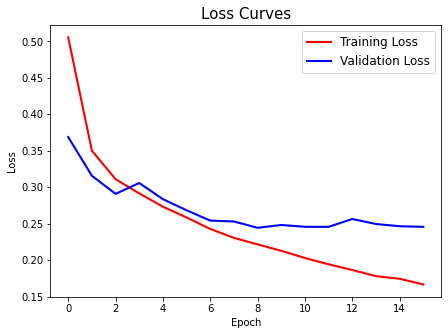

In [43]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["loss"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_loss"], "b", linewidth = 2.1) 
plt.legend(["Training Loss", "Validation Loss"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Loss", fontsize = 10) 
plt.title("Loss Curves", fontsize = 15)
plt.show()

##### Accuracy Curves

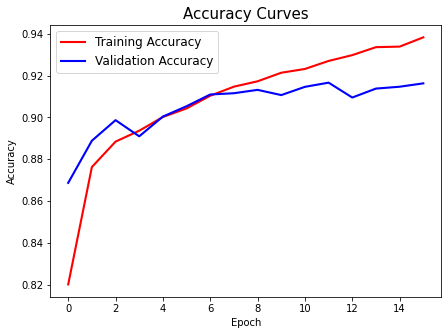

In [44]:
plt.figure(figsize = [7, 5]) 
plt.plot(cnn_mnist.history["accuracy"], "r", linewidth = 2.1) 
plt.plot(cnn_mnist.history["val_accuracy"], "b", linewidth = 2.1) 
plt.legend(["Training Accuracy", "Validation Accuracy"],fontsize = 12) 
plt.xlabel("Epoch", fontsize = 10)
plt.ylabel("Accuracy", fontsize = 10) 
plt.title("Accuracy Curves", fontsize = 15)
plt.show()

##### Test Set Evaluation

In [45]:
[cnn_loss, cnn_acc] = cnn.evaluate(X_test, y_test)
print("\nEvaluation result on Test Set :\n\n Loss = {0:.3f}\n Accuracy = {1:.3f}".format(cnn_loss, cnn_acc))
 
print(" Training Time: {0:.3f}s".format(cnn_tt))

313/313 [==============================] - 1s 3ms/step - loss: 0.2582 - accuracy: 0.9140

Evaluation result on Test Set :

 Loss = 0.258
 Accuracy = 0.914
 Training Time: 73.578s


## 3.4. Model Comparison

In [46]:
if cnn_acc > mnn_acc:
  print("The convolutial neural network has the best test accuracy")
  print("Test accuracy = {0:.3f}".format(cnn_acc))
  print("The convolutial neural network test accuracy is {0:.3f}% better than the multilayer neural network".format(100*(cnn_acc-mnn_acc)/mnn_acc))
else:
  print("The multilayer neural network has the best test accuracy")
  print("Test Accuracy = {0:.3f}".format(mnn_acc))
  print("The multilayer neural network test accuracy is {0:.3f}% better than the convolutial neural network".format(100*(mnn_acc-cnn_acc)/cnn_acc))

print()

if cnn_tt < mnn_tt:
  print("The convolutial neural network has the best training time")
  print("Training time = {0:.3f}s".format(cnn_tt))
  print("The convolutial neural network training time is {0:.3f}% faster than the multilayer neural network".format(100*(mnn_tt-cnn_tt)/cnn_tt))
else:
  print("The multilayer neural network has the best training time")
  print("Training time = {0:.3f}s".format(mnn_tt))
  print("The multilayer neural network training time is {0:.3f}% faster than the convolutial neural network".format(100*(cnn_tt-mnn_tt)/mnn_tt))

The convolutial neural network has the best test accuracy
Test accuracy = 0.914
The convolutial neural network test accuracy is 3.569% better than the multilayer neural network

The multilayer neural network has the best training time
Training time = 63.052s
The multilayer neural network training time is 16.694% faster than the convolutial neural network


# 4. Conclusion

We can notice that for both datasets the convolutional networks have a little better accuracy than the multilayer network, however their training time is much longer.
